# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Reading Data

In [14]:
df= pd.read_csv('Housing.csv')

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Cleaning the data (String to int64)

In [24]:
df['mainroad'] = df['mainroad'].astype('category')
df['mainroad'] = df['mainroad'].cat.codes

df['guestroom'] = df['guestroom'].astype('category')
df['guestroom'] = df['guestroom'].cat.codes

df['basement'] = df['basement'].astype('category')
df['basement'] = df['basement'].cat.codes

df['hotwaterheating'] = df['hotwaterheating'].astype('category')
df['hotwaterheating'] = df['hotwaterheating'].cat.codes

df['airconditioning'] = df['airconditioning'].astype('category')
df['airconditioning'] = df['airconditioning'].cat.codes

df['prefarea'] = df['prefarea'].astype('category')
df['prefarea'] = df['prefarea'].cat.codes

code_mapping_furniture = {'unfurnished':0, 'semi-furnished':1, 'furnished':2}
df['furnishingstatus'] = df['furnishingstatus'].astype('category')
df['furnishingstatus'] = df['furnishingstatus'].map(code_mapping_furniture)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


# checking if the df contains null values

In [26]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Defining the shape of data frame(df)

In [17]:
df.shape

(545, 13)

# Printing the information about the df

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [20]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64
********************
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64
********************
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
********************
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
********************
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
********************
yes    468
no      77
Name: mainroad, dtype: int64
********************
no     448
yes     97
Name: guestroom, dtype: int64
********************
no     354
yes    191
Name: basement, dtype: int64
********************
no     520
yes     25
Name: hotwaterheating, dtype: int64
********************
no     373
yes    172
N

# defining target value and independent varaiable  

In [27]:
x = df.drop(columns = 'price')
y = df['price']
y_max = max(df['price'])
print(y_max)

13300000


# outliers detections and removal

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

In [30]:
outlier_detector = IsolationForest(contamination=0.07)
outlier_detector.fit(x)
outliers=outlier_detector.predict(x)
x_clean= x[outliers == 1]
y_clean= y[outliers ==1]


C:\Users\Pragati Kedia\jupyter anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


# Split Data and Training the model

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print("complete")

complete


In [32]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Done")

Done


In [33]:
c = model.intercept_
m = model.coef_
print(c)
print(m)

-353311.8336093286
[2.48857876e+02 1.34994406e+05 9.50583380e+05 4.18321569e+05
 4.66890751e+05 3.68497644e+05 3.59364424e+05 1.24665331e+06
 8.97037026e+05 2.23301809e+05 6.96754525e+05 2.30222653e+05]


In [34]:
y_pred_train = model.predict(x_train)
print("complete")

complete


RESULT WITH TRAINED DATA
Number of data train:  381


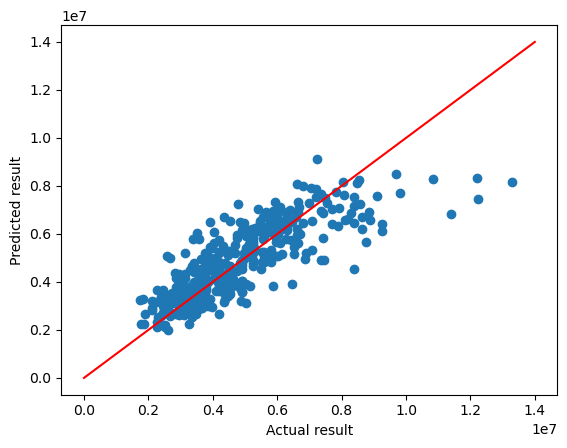

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,14000000])
y_point = np.array([0,14000000])
# max value of y is around 13 million
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TRAINED DATA")
print("Number of data train: ", len(x_train))
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2_score_without_test = r2_score(y_train, y_pred_train)
print(r2_score_without_test)

0.6575703217254214


# Testing the model with tested data

In [37]:
y_pred_test = model.predict(x_test)
print("Complete")

Complete


RESULT WITH TESTED DATA
Number of data test:  164


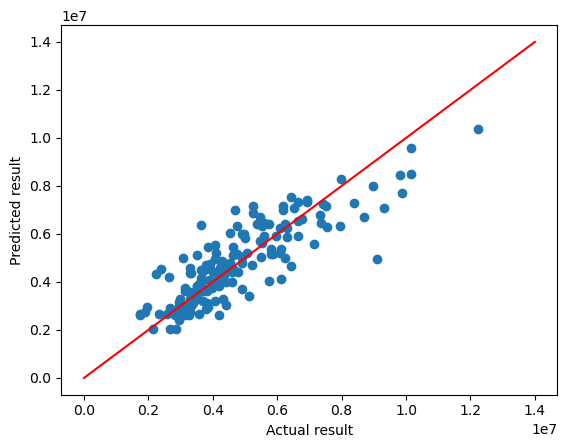

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,14000000])
y_point = np.array([0,14000000])
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TESTED DATA")
print("Number of data test: ", len(x_test))
plt.show()

In [39]:
from sklearn.metrics import r2_score
r2_score_with_test = r2_score(y_test, y_pred_test)
print(r2_score_with_test)

0.7235015223200351
